In [97]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [98]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [99]:
apt = pd.read_csv('../data/아파트실거래가 년월일.csv', 
                                          encoding='euc-kr', thousands=',',
                                          index_col=0)
apt.head()

,시구동단지명,년월일,매매가
1.0,광주광역시 서구 화정동 흥국 64.55,20070515,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20070618,4700
NaN,광주광역시 서구 화정동 흥국 64.55,20070710,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080218,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080527,5000


In [100]:
apt.rename(columns={"년월일":"date"}, inplace=True)
apt.rename(columns={"매매가":"hit"}, inplace=True)
apt.head()

,시구동단지명,date,hit
1.0,광주광역시 서구 화정동 흥국 64.55,20070515,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20070618,4700
NaN,광주광역시 서구 화정동 흥국 64.55,20070710,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080218,5100
NaN,광주광역시 서구 화정동 흥국 64.55,20080527,5000


In [101]:
df = apt.reset_index()

In [102]:
df.head()

,index,시구동단지명,date,hit
0,1.0,광주광역시 서구 화정동 흥국 64.55,20070515,5100
1,NaN,광주광역시 서구 화정동 흥국 64.55,20070618,4700
2,NaN,광주광역시 서구 화정동 흥국 64.55,20070710,5100
3,NaN,광주광역시 서구 화정동 흥국 64.55,20080218,5100
4,NaN,광주광역시 서구 화정동 흥국 64.55,20080527,5000


In [103]:
df = apt.loc[apt["시구동단지명"]=="광주광역시 북구 용봉동 삼성 133.35",["시구동단지명","date","hit"]]

In [104]:
df=df.rename(columns={'date':'ds', 'hit':'y'})
df.head()

,시구동단지명,ds,y
NaN,광주광역시 북구 용봉동 삼성 133.35,20061201,14400
NaN,광주광역시 북구 용봉동 삼성 133.35,20061204,13000
NaN,광주광역시 북구 용봉동 삼성 133.35,20070104,14250
NaN,광주광역시 북구 용봉동 삼성 133.35,20070205,14000
NaN,광주광역시 북구 용봉동 삼성 133.35,20070501,15700


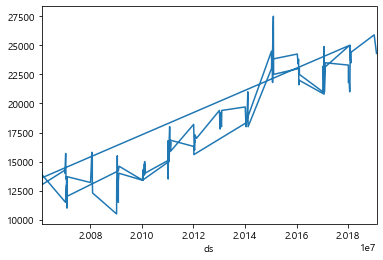

In [105]:
df.set_index('ds').y.plot()

In [137]:
model = Prophet(yearly_seasonality =True,weekly_seasonality=False,daily_seasonality=True )
model.fit(df)

In [138]:
future = model.make_future_dataframe(periods=630,freq = 'm')
future.tail()

,ds
765,2022-02-28 00:00:00.020191018
766,2022-03-31 00:00:00.020191018
767,2022-04-30 00:00:00.020191018
768,2022-05-31 00:00:00.020191018
769,2022-06-30 00:00:00.020191018


In [139]:
forecast = model.predict(future)

In [140]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
765,2022-02-28 00:00:00.020191018,27751.688267,25103.747988,28568.732219,27425.169273,28088.568069,-925.469419,-925.469419,-925.469419,-1209.82112,-1209.82112,-1209.82112,284.351701,284.351701,284.351701,0.0,0.0,0.0,26826.218848
766,2022-03-31 00:00:00.020191018,27814.591296,24739.065741,27901.672528,27466.630539,28165.728739,-1508.591210,-1508.591210,-1508.591210,-1209.82112,-1209.82112,-1209.82112,-298.770090,-298.770090,-298.770090,0.0,0.0,0.0,26306.000086
767,2022-04-30 00:00:00.020191018,27875.465195,25533.110757,28732.316437,27512.020172,28252.126933,-707.797789,-707.797789,-707.797789,-1209.82112,-1209.82112,-1209.82112,502.023331,502.023331,502.023331,0.0,0.0,0.0,27167.667406
768,2022-05-31 00:00:00.020191018,27938.368224,25645.125033,28756.549106,27554.875895,28338.638246,-667.233545,-667.233545,-667.233545,-1209.82112,-1209.82112,-1209.82112,542.587576,542.587576,542.587576,0.0,0.0,0.0,27271.134680
769,2022-06-30 00:00:00.020191018,27999.242123,23983.183325,27149.703760,27599.010083,28426.386570,-2383.880513,-2383.880513,-2383.880513,-1209.82112,-1209.82112,-1209.82112,-1174.059393,-1174.059393,-1174.059393,0.0,0.0,0.0,25615.361610


In [141]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
765,2022-02-28 00:00:00.020191018,26826.218848,25103.747988,28568.732219
766,2022-03-31 00:00:00.020191018,26306.000086,24739.065741,27901.672528
767,2022-04-30 00:00:00.020191018,27167.667406,25533.110757,28732.316437
768,2022-05-31 00:00:00.020191018,27271.134680,25645.125033,28756.549106
769,2022-06-30 00:00:00.020191018,25615.361610,23983.183325,27149.703760


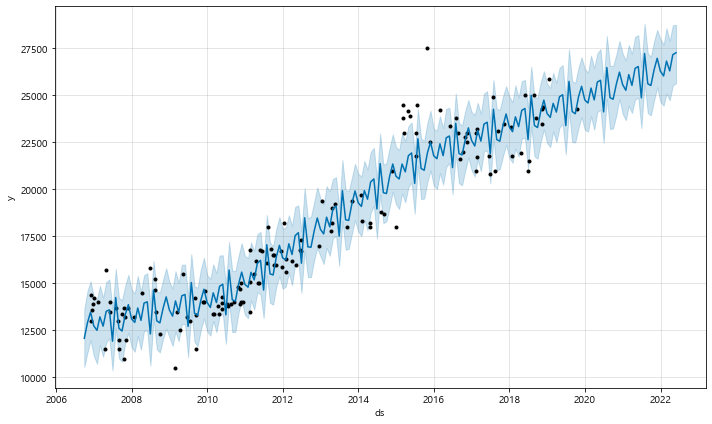

In [142]:
model.plot(forecast[580:769]);